In [1]:
!pip install opencv-python numpy torch torchvision imageio imageio-ffmpeg tqdm git+https://github.com/princeton-vl/RAFT.git


  Cloning https://github.com/princeton-vl/RAFT.git to /tmp/pip-req-build-k96vnmrs
  Running command git clone --filter=blob:none --quiet https://github.com/princeton-vl/RAFT.git /tmp/pip-req-build-k96vnmrs
  Resolved https://github.com/princeton-vl/RAFT.git to commit 3fa0bb0a9c633ea0a9bb8a79c576b6785d4e6a02
ERROR: git+https://github.com/princeton-vl/RAFT.git does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.


In [2]:
!pip install numpy==1.19.5
!pip install facenet-pytorch==2.2.9

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 54.7 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for numpy (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for numpy
Failed to build numpy
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (numpy)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 21.4 MB/s eta 0:00:0000:0100:01


In [3]:
import os
import json
import cv2
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
DFDC_PATH = "/kaggle/input/deepfake-detection-challenge"
OUTPUT_PATH = "/kaggle/working"

In [5]:
# Path to DFDC sample train videos
sample_train_path = "/kaggle/input/deepfake-detection-challenge/train_sample_videos"

# List all files
files = os.listdir(sample_train_path)

# Look for JSON metadata
metadata_file = next((f for f in files if f.endswith(".json")), None)

if metadata_file:
    metadata_path = os.path.join(sample_train_path, metadata_file)
    with open(metadata_path, 'r') as f:
        metadata = json.load(f)
    print(f"Loaded metadata: {metadata_file}")
    print(f"Total video entries: {len(metadata)}")
    sample_key = list(metadata.keys())[0]
    print(f"Sample entry: {sample_key} → {metadata[sample_key]}")
else:
    print("No metadata JSON file found.")


Loaded metadata: metadata.json
Total video entries: 400
Sample entry: aagfhgtpmv.mp4 → {'label': 'FAKE', 'split': 'train', 'original': 'vudstovrck.mp4'}


In [6]:
# Correct path to metadata
meta_path = "/kaggle/input/deepfake-detection-challenge/train_sample_videos/metadata.json"

# Load JSON metadata
with open(meta_path, 'r') as f:
    metadata = json.load(f)

# Show number of entries
print(f"Loaded metadata.json with {len(metadata)} entries\n")

# Print first 10 entries
for i, (video, info) in enumerate(metadata.items()):
    print(f"{i+1}.{video} → label: {info['label']}, original: {info.get('original', 'N/A')}")
    if i == 9:
        break


Loaded metadata.json with 400 entries

1.aagfhgtpmv.mp4 → label: FAKE, original: vudstovrck.mp4
2.aapnvogymq.mp4 → label: FAKE, original: jdubbvfswz.mp4
3.abarnvbtwb.mp4 → label: REAL, original: None
4.abofeumbvv.mp4 → label: FAKE, original: atvmxvwyns.mp4
5.abqwwspghj.mp4 → label: FAKE, original: qzimuostzz.mp4
6.acifjvzvpm.mp4 → label: FAKE, original: kbvibjhfzo.mp4
7.acqfdwsrhi.mp4 → label: FAKE, original: ccfoszqabv.mp4
8.acxnxvbsxk.mp4 → label: FAKE, original: fjlyaizcwc.mp4
9.acxwigylke.mp4 → label: FAKE, original: ffcwhpnpuw.mp4
10.aczrgyricp.mp4 → label: FAKE, original: slwkmefgde.mp4


In [7]:
os.listdir("/kaggle/input/deepfake-detection-challenge/train_sample_videos")

['eivxffliio.mp4',
 'dwediigjit.mp4',
 'asvcrfdpnq.mp4',
 'dntkzzzcdh.mp4',
 'dboxtiehng.mp4',
 'elginszwtk.mp4',
 'cwbacdwrzo.mp4',
 'afoovlsmtx.mp4',
 'cmxcfkrjiv.mp4',
 'aczrgyricp.mp4',
 'dptrzdvwpg.mp4',
 'dsgpbgsrdm.mp4',
 'emfbhytfhc.mp4',
 'cdbsbdymzd.mp4',
 'acqfdwsrhi.mp4',
 'bkvetcojbt.mp4',
 'dnyvfblxpm.mp4',
 'duycddgtrl.mp4',
 'arkroixhey.mp4',
 'ctzmavwror.mp4',
 'altziddtxi.mp4',
 'aknbdpmgua.mp4',
 'efdyrflcpg.mp4',
 'dxbqjxrhin.mp4',
 'czkdanyadc.mp4',
 'ejkqesyvam.mp4',
 'dsdoseflas.mp4',
 'akvmwkdyuv.mp4',
 'dnexlwbcxq.mp4',
 'abofeumbvv.mp4',
 'dlrsbscitn.mp4',
 'alvgwypubw.mp4',
 'eoewqcpbgt.mp4',
 'btmsngnqhv.mp4',
 'apatcsqejh.mp4',
 'dakiztgtnw.mp4',
 'eiwopxzjfn.mp4',
 'andaxzscny.mp4',
 'bgvhtpzknn.mp4',
 'djvtbgwdcc.mp4',
 'blzydqdfem.mp4',
 'dbzpcjntve.mp4',
 'chviwxsfhg.mp4',
 'bmioepcpsx.mp4',
 'ddhfabwpuz.mp4',
 'bahdpoesir.mp4',
 'dptbnjnkdg.mp4',
 'alaijyygdv.mp4',
 'aelzhcnwgf.mp4',
 'crezycjqyk.mp4',
 'ehdkmxgtxh.mp4',
 'bejhvclboh.mp4',
 'erqgqacbqe

In [8]:
video_folder = os.path.join(DFDC_PATH, "train_sample_videos")
frame_output = os.path.join(OUTPUT_PATH, "frames")
os.makedirs(frame_output, exist_ok=True)

def extract_frames(video_path, output_folder, frame_rate=1):
    cap = cv2.VideoCapture(video_path)
    count = 0
    while cap.isOpened():
        success, frame = cap.read()
        if not success:
            break
        if count % frame_rate == 0:
            frame_path = os.path.join(
                output_folder,
                f"{os.path.basename(video_path).split('.')[0]}_{count:04d}.jpg"
            )
            cv2.imwrite(frame_path, frame)
        count += 1
    cap.release()

# Extract frames from the first 10 videos only, into separate folders
videos = sorted(os.listdir(video_folder))[:100]  # consistent order
for video in tqdm(videos, desc="Processing videos"):
    video_name = os.path.splitext(video)[0]
    video_output_folder = os.path.join(frame_output, video_name)
    os.makedirs(video_output_folder, exist_ok=True)

    video_path = os.path.join(video_folder, video)
    extract_frames(video_path, video_output_folder)


Processing videos: 100%|██████████| 100/100 [05:38<00:00,  3.38s/it]


In [9]:
# Remove all .jpg files directly in the 'frames' folder (not touching subfolders)
for f in os.listdir(frame_output):
    file_path = os.path.join(frame_output, f)
    if f.lower().endswith('.jpg') and os.path.isfile(file_path):
        os.remove(file_path)

print("Old top-level frame images removed.")


Old top-level frame images removed.


In [10]:
flow_root = os.path.join(OUTPUT_PATH, "optical_flow")

# Walk through each subfolder and delete all .jpg flow images
for root, dirs, files in os.walk(flow_root):
    for file in files:
        if file.lower().endswith('.jpg'):
            os.remove(os.path.join(root, file))

print("All flow .jpg images removed from optical_flow folders.")


All flow .jpg images removed from optical_flow folders.


In [11]:
frame_root = os.path.join(OUTPUT_PATH, "frames")
flow_root = os.path.join(OUTPUT_PATH, "optical_flow")
os.makedirs(flow_root, exist_ok=True)

def compute_optical_flow(prev_img_path, next_img_path, out_path):
    prev_img = cv2.imread(prev_img_path)
    next_img = cv2.imread(next_img_path)

    # Resize to speed up
    prev_img = cv2.resize(prev_img, (256, 256))
    next_img = cv2.resize(next_img, (256, 256))

    prev_gray = cv2.cvtColor(prev_img, cv2.COLOR_BGR2GRAY)
    next_gray = cv2.cvtColor(next_img, cv2.COLOR_BGR2GRAY)

    flow = cv2.calcOpticalFlowFarneback(
        prev_gray, next_gray, None,
        pyr_scale=0.5, levels=3, winsize=15,
        iterations=3, poly_n=5, poly_sigma=1.2, flags=0
    )

    mag, ang = cv2.cartToPolar(flow[..., 0], flow[..., 1])
    hsv = np.zeros_like(prev_img)
    hsv[..., 1] = 255
    hsv[..., 0] = ang * 180 / np.pi / 2
    hsv[..., 2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)
    flow_rgb = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

    cv2.imwrite(out_path, flow_rgb)

# Iterate through each video's frame folder
video_folders = sorted(os.listdir(frame_root))

for video_name in tqdm(video_folders, desc="Processing videos"):
    video_frame_folder = os.path.join(frame_root, video_name)
    video_flow_folder = os.path.join(flow_root, video_name)
    os.makedirs(video_flow_folder, exist_ok=True)

    frame_files = sorted([f for f in os.listdir(video_frame_folder) if f.lower().endswith('.jpg')])

    for i in range(len(frame_files) - 1):
        frame1 = os.path.join(video_frame_folder, frame_files[i])
        frame2 = os.path.join(video_frame_folder, frame_files[i + 1])
        out_path = os.path.join(video_flow_folder, f"flow_{i:04d}.jpg")
        compute_optical_flow(frame1, frame2, out_path)


Processing videos: 100%|██████████| 100/100 [24:38<00:00, 14.78s/it]


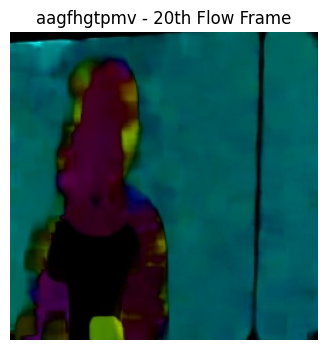

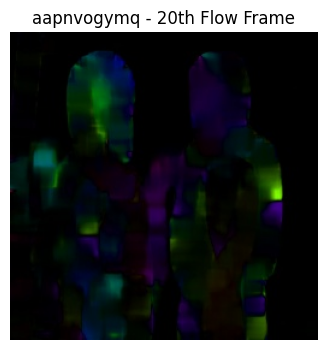

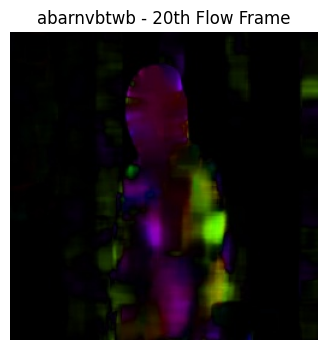

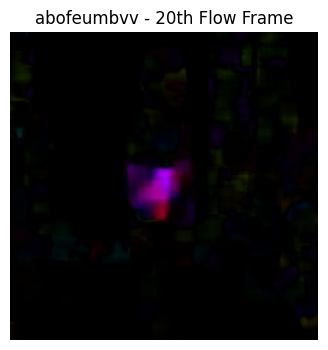

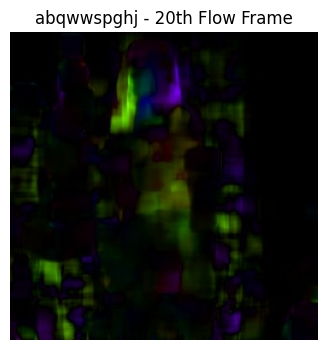

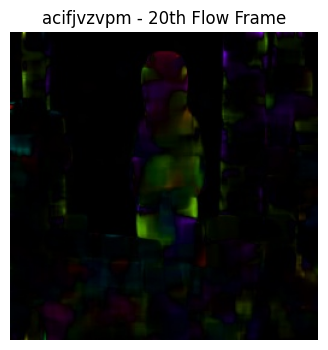

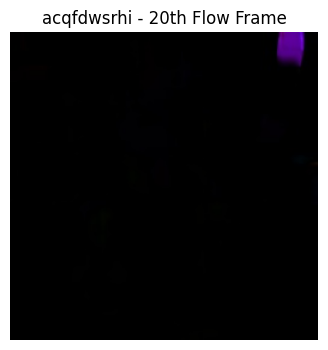

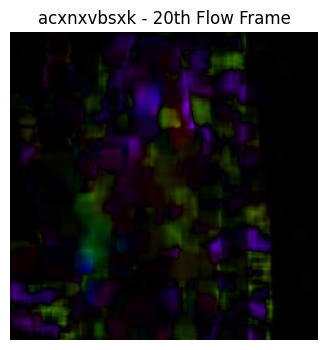

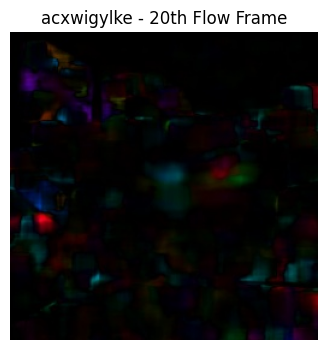

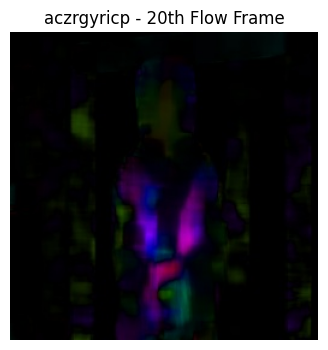

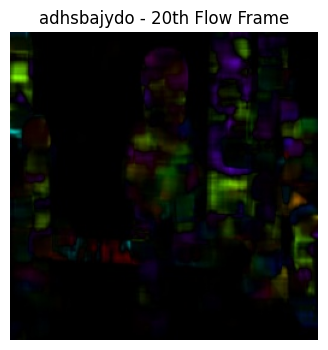

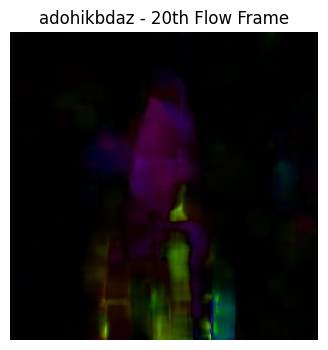

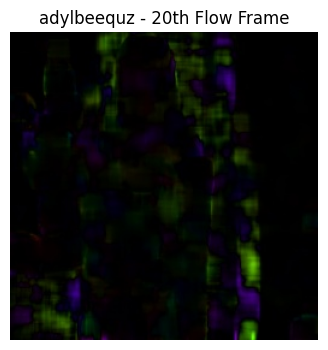

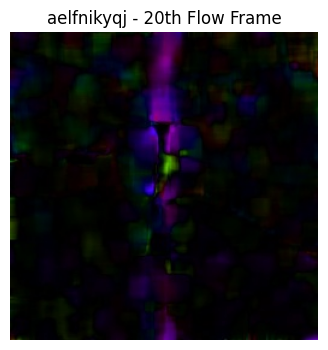

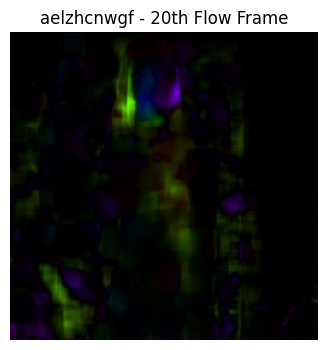

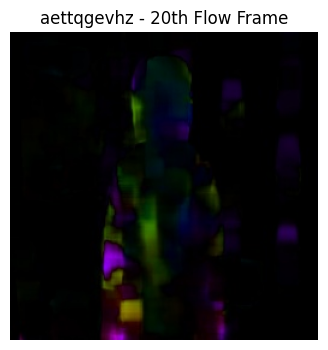

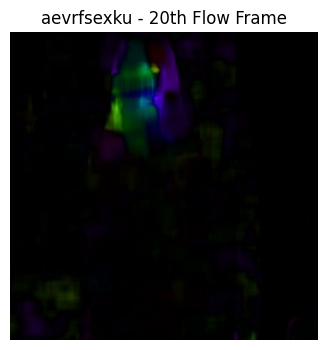

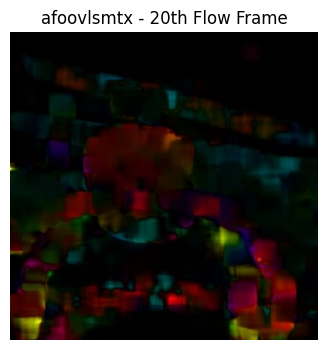

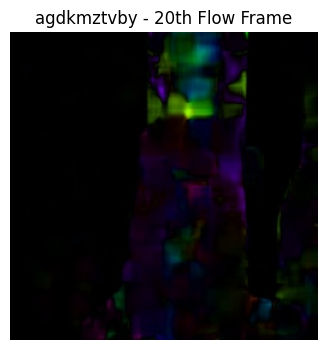

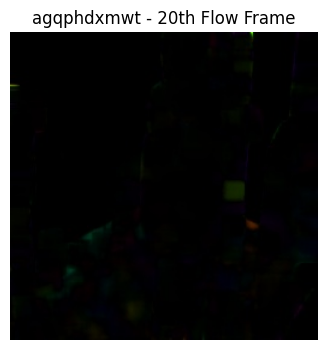

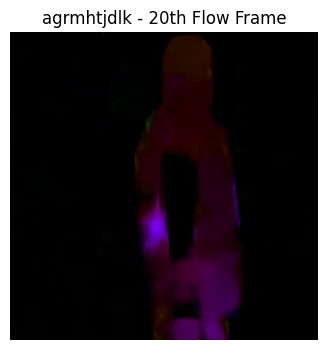

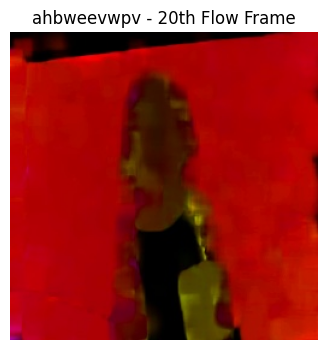

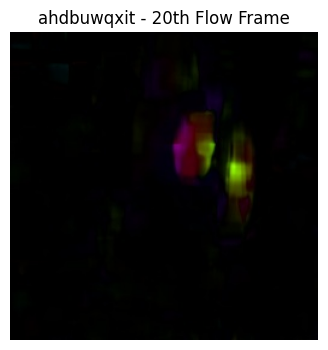

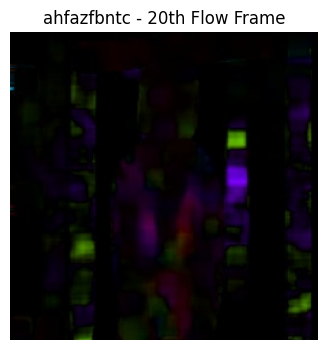

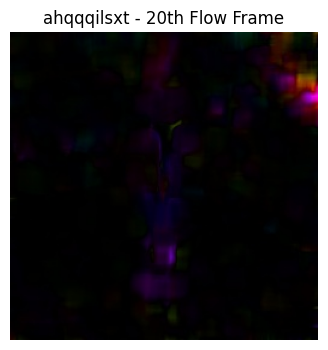

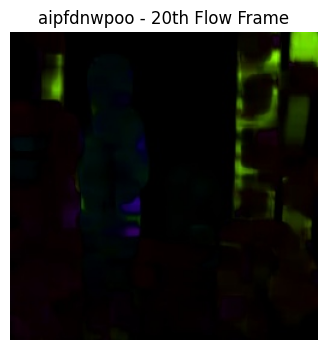

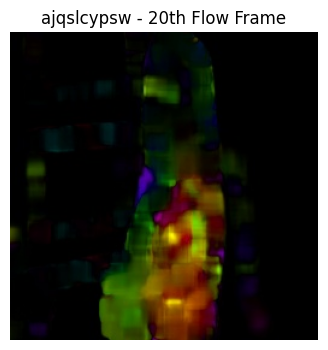

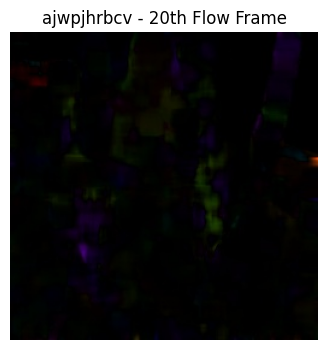

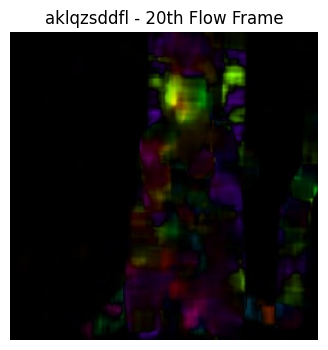

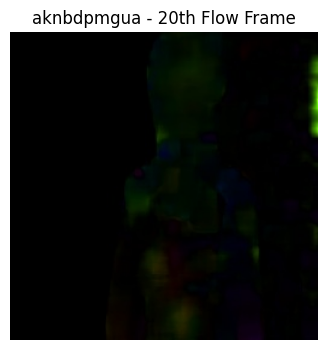

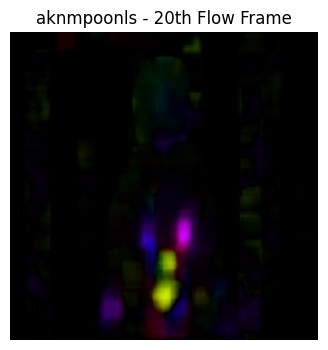

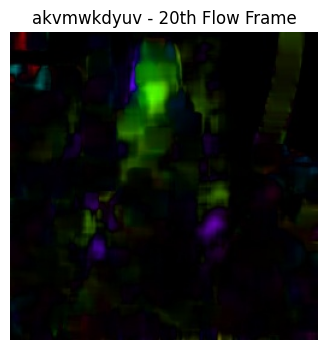

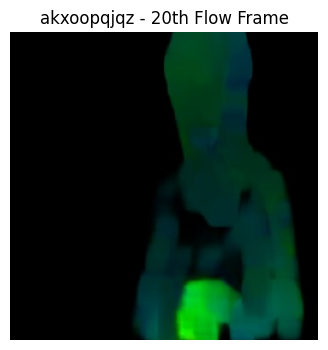

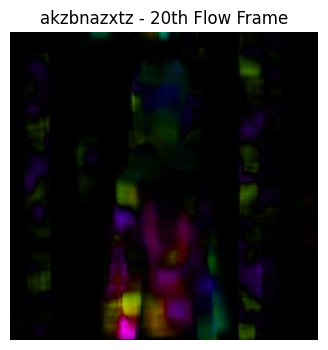

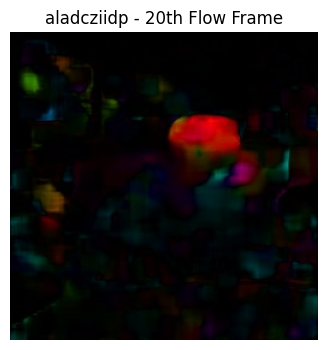

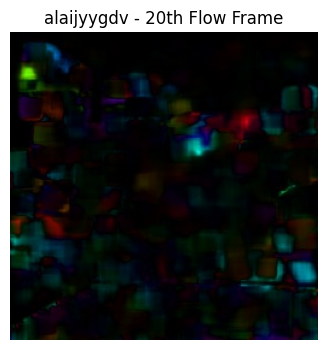

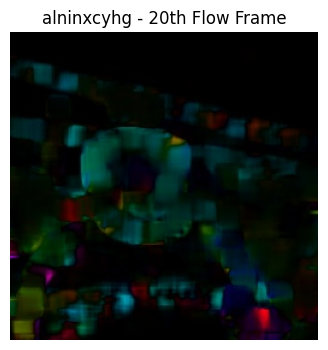

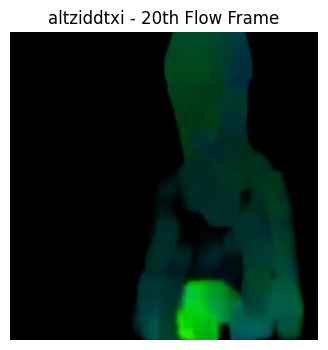

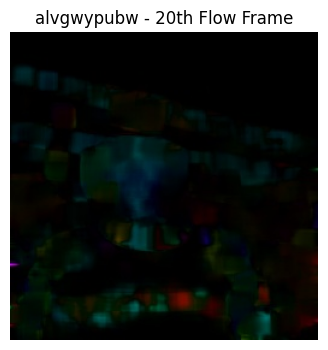

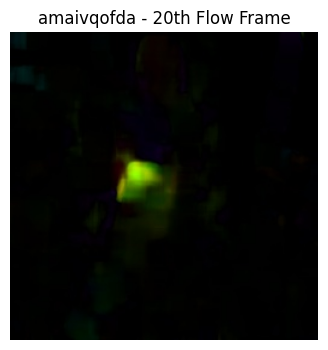

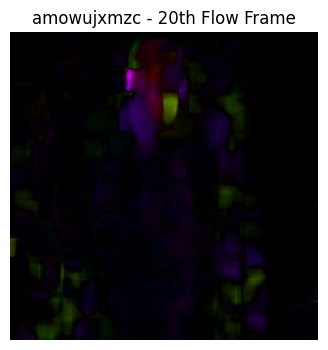

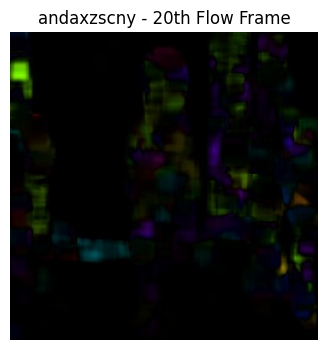

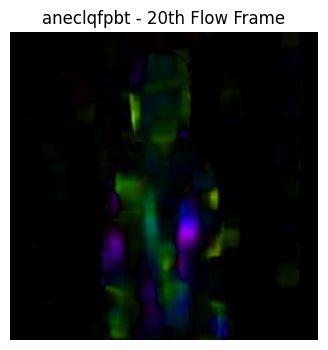

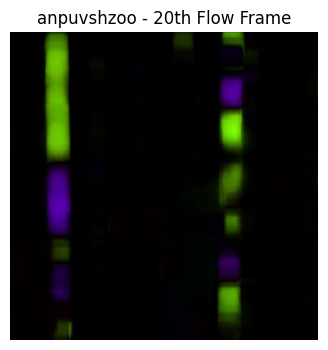

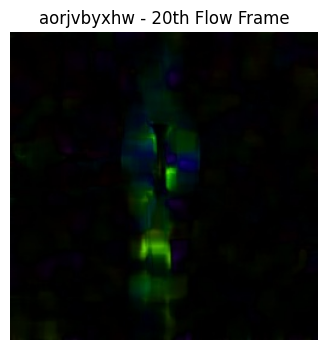

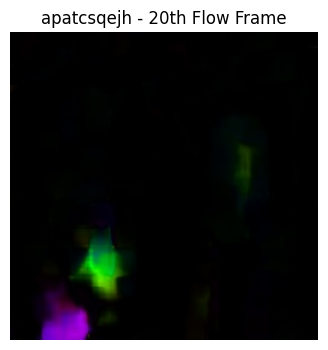

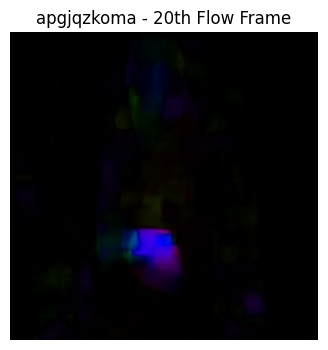

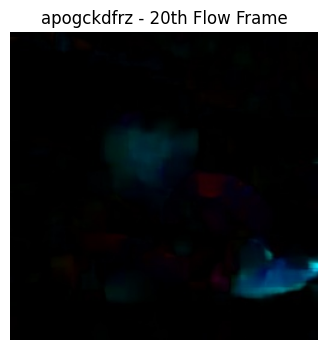

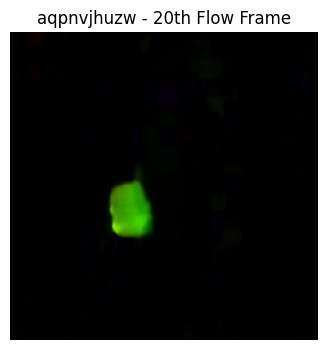

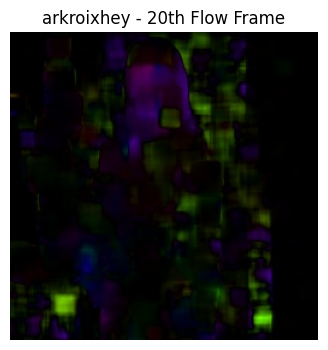

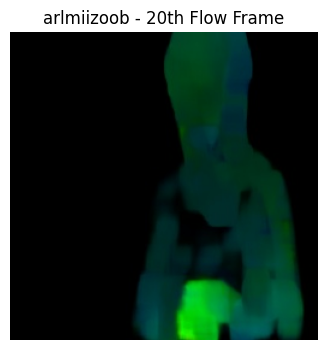

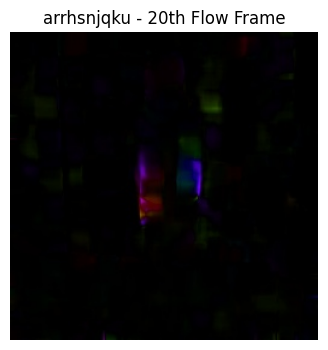

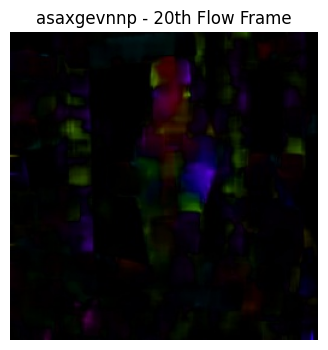

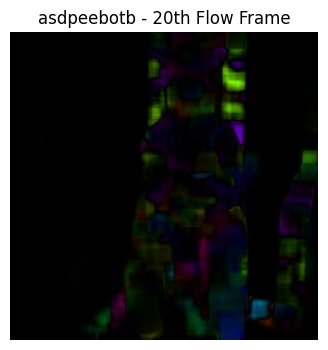

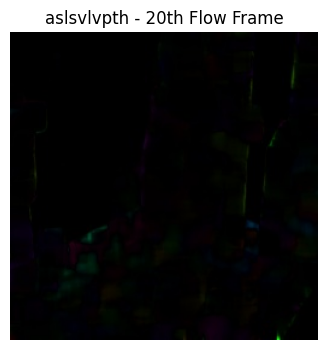

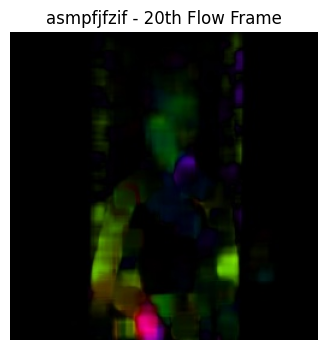

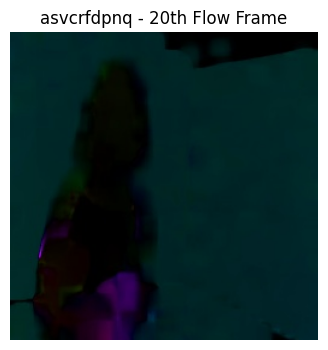

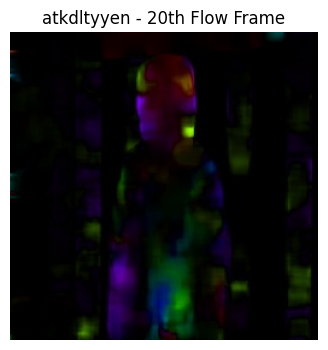

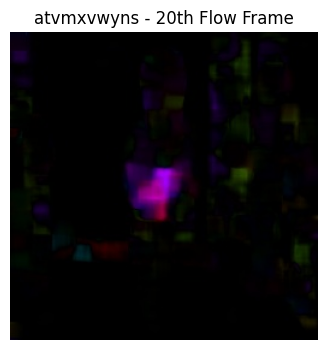

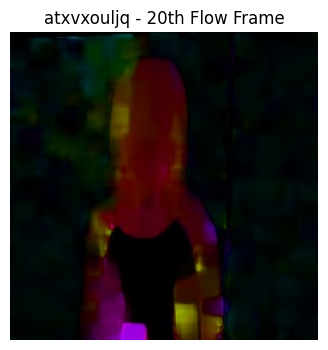

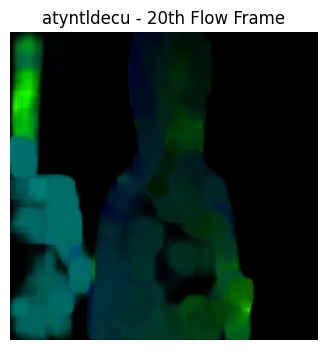

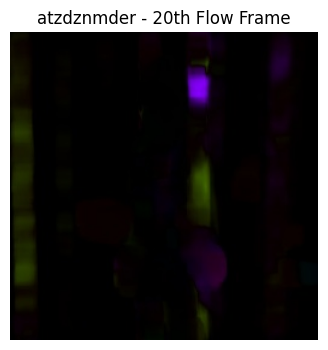

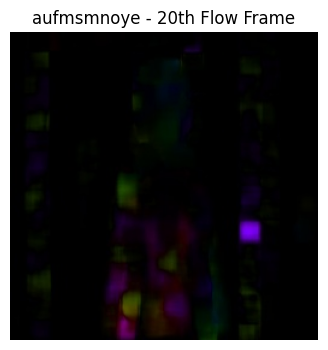

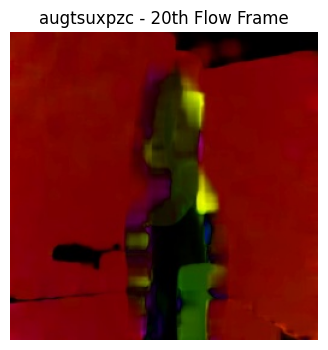

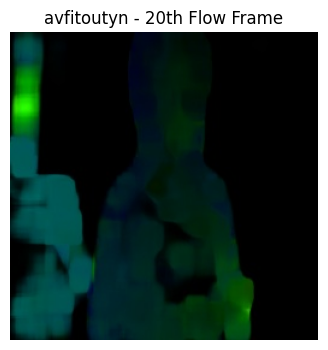

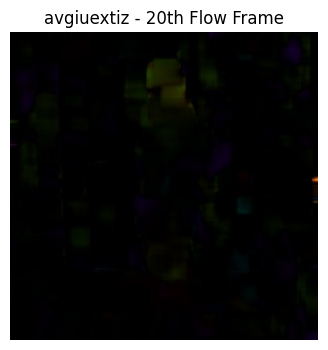

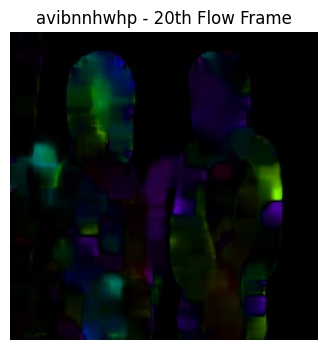

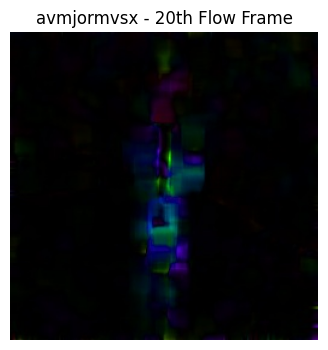

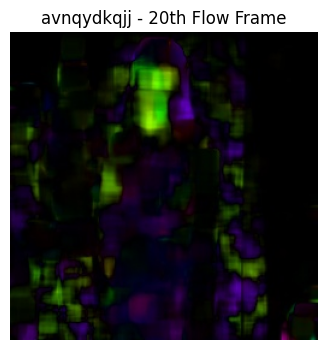

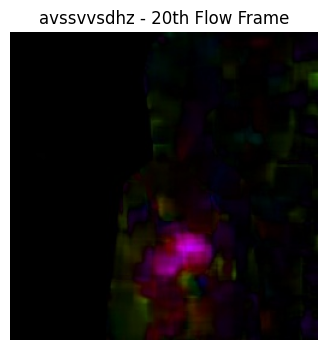

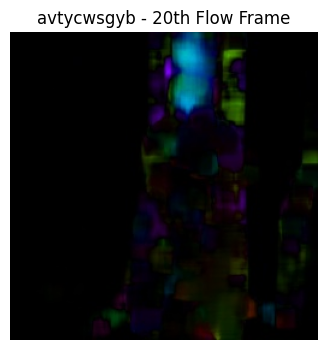

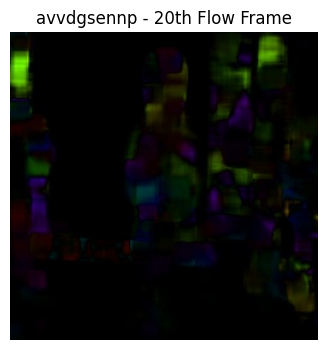

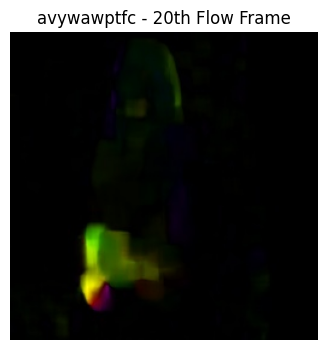

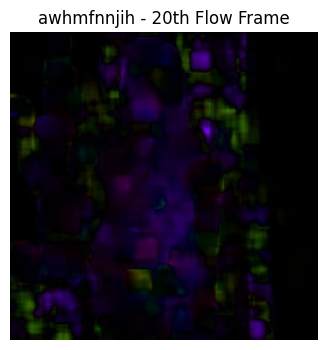

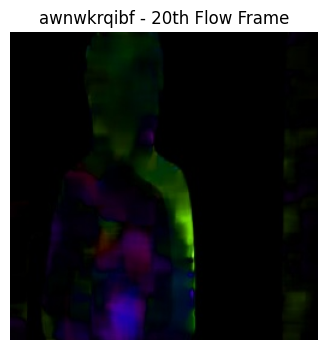

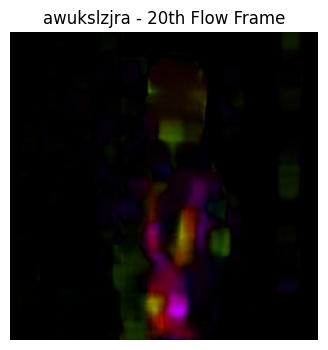

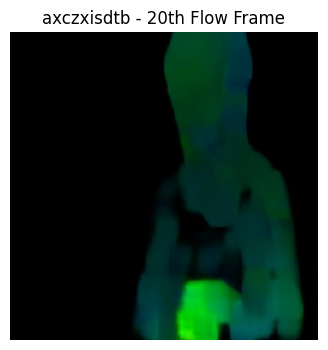

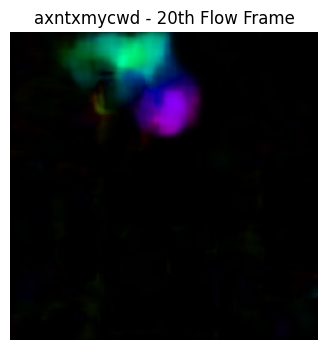

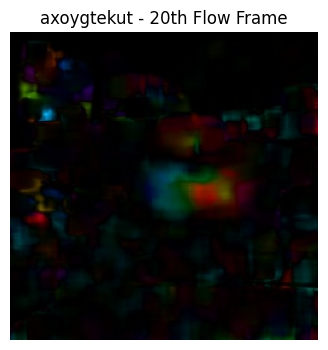

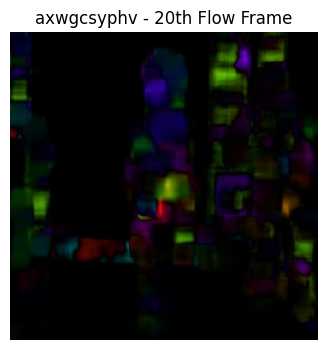

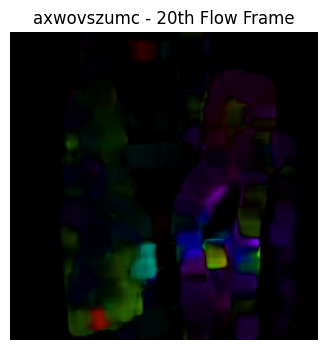

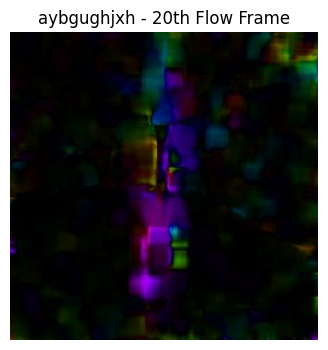

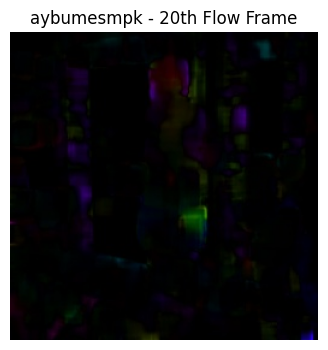

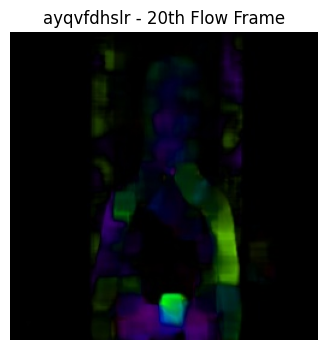

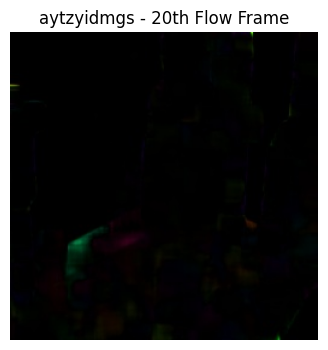

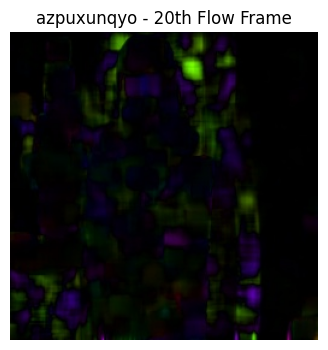

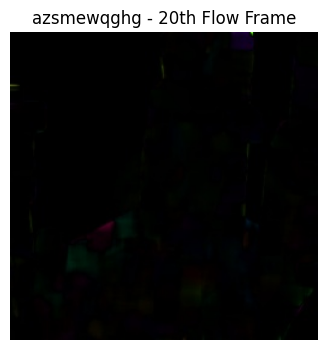

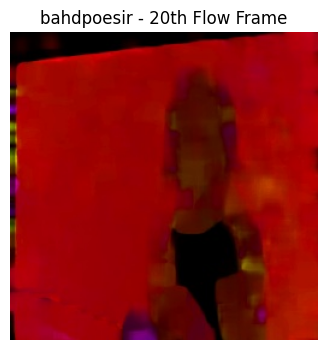

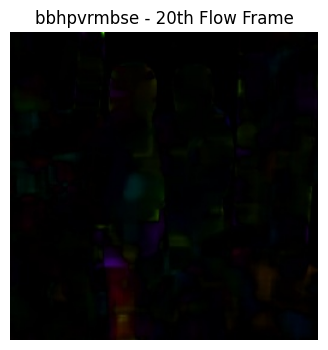

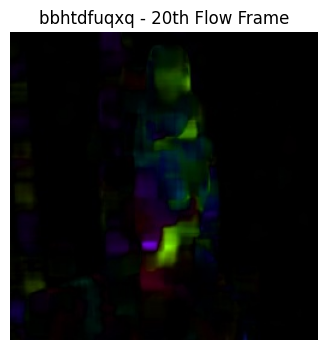

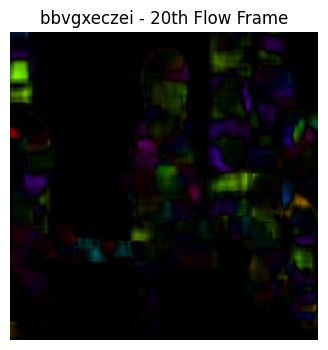

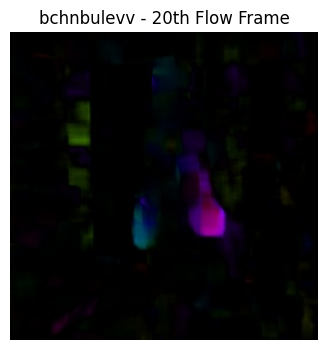

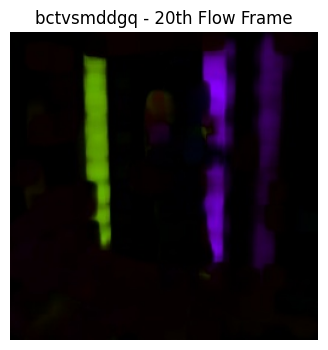

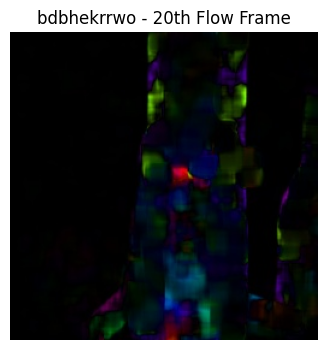

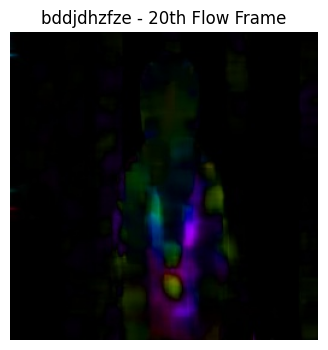

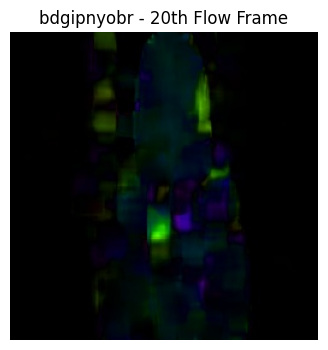

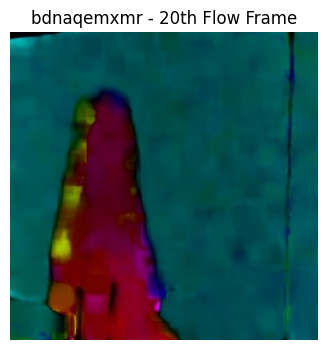

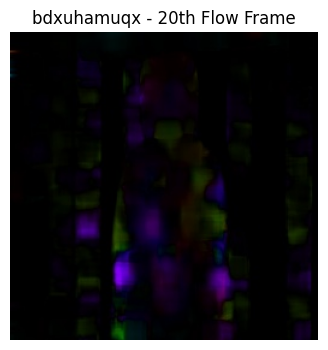

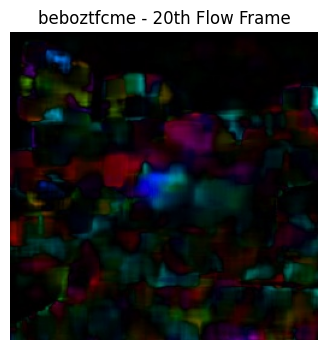

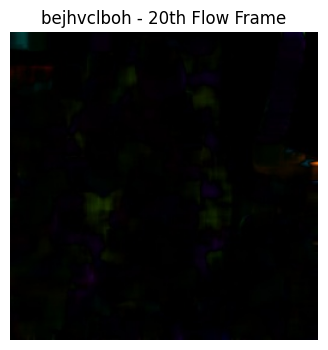

In [12]:
def show_flow_image(img_path, title):
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(4, 4))
    plt.imshow(img_rgb)
    plt.title(title)
    plt.axis("off")
    plt.show()

# Get subfolders (one per video)
video_folders = sorted([
    d for d in os.listdir(flow_root)
    if os.path.isdir(os.path.join(flow_root, d))
])

# Show the 20th frame in each
for folder in video_folders:
    folder_path = os.path.join(flow_root, folder)
    flow_images = sorted([
        f for f in os.listdir(folder_path)
        if f.lower().endswith('.jpg')
    ])

    if len(flow_images) > 20:
        img_path = os.path.join(folder_path, flow_images[19])  # index 19 = 20th image
        show_flow_image(img_path, title=f"{folder} - 20th Flow Frame")
    else:
        print(f"{folder}: Less than 20 frames.")


In [13]:
import kagglehub

In [14]:
# Set paths
combined_path = "/kaggle/input/train-comb"
combined_csv_path = os.path.join(combined_path, "train_files.csv")
frame_root = os.path.join(OUTPUT_PATH, "frames")
flow_root = os.path.join(OUTPUT_PATH, "optical_flow")

# Load combined.csv
df = pd.read_csv(combined_csv_path)
df['video_id'] = df['video name'].astype(str)

# Get all unique *_c columns (full AU list)
au_columns = sorted([col for col in df.columns if col.endswith('_c')])
expected_au_count = len(au_columns)

# Sort folders by creation time
video_folders = sorted(
    [f for f in os.listdir(flow_root) if os.path.isdir(os.path.join(flow_root, f))],
    key=lambda x: os.path.getctime(os.path.join(flow_root, x))
)

# Map folder → video_id
folder_to_video_id = {folder: folder for folder in video_folders}

# Collect dataset rows
final_rows = []

for folder, video_id in tqdm(folder_to_video_id.items(), desc="Processing videos"):
    video_flow_folder = os.path.join(flow_root, folder)
    flow_files = sorted([f for f in os.listdir(video_flow_folder) if f.endswith('.jpg')])

    for flow_file in flow_files:
        frame_idx = int(flow_file.split('_')[1].split('.')[0]) + 1
        flow_path = os.path.join(video_flow_folder, flow_file)

        row = df[(df['video_id'] == folder) & (df['frame'] == frame_idx)]
        if row.empty:
            continue

        # Ensure all AU columns are present
        row_filled = row.reindex(columns=au_columns, fill_value=0)

        au_values = row_filled.iloc[0].tolist()
        final_rows.append([flow_path] + au_values)

# Create and save final dataset
output_df = pd.DataFrame(final_rows, columns=["flow_path"] + au_columns)
output_df.to_csv("optical_flow_au_dataset.csv", index=False)
print(f"Final dataset saved with {expected_au_count} standardized AU columns.")


Processing videos: 100%|██████████| 100/100 [01:25<00:00,  1.16it/s]


Final dataset saved with 18 standardized AU columns.


In [15]:
# Set paths
combined_path = "/kaggle/input/train-comb"
combined_csv_path = os.path.join(combined_path, "train_files.csv")
flow_root = os.path.join(OUTPUT_PATH, "optical_flow")

# Load combined.csv
df = pd.read_csv(combined_csv_path)
df['video_id'] = df['video name'].astype(str)


# Load metadata.json
with open("/kaggle/input/deepfake-detection-challenge/train_sample_videos/metadata.json", 'r') as f:
    metadata = json.load(f)

# Create label list: 0 = REAL, 1 = FAKE (first N = number of folders)
video_labels = [0 if v['label'] == 'REAL' else 1 for v in list(metadata.values())]
video_names = list(metadata.keys())

# Get all AU columns
au_columns = sorted([col for col in df.columns if col.endswith('_c')])
expected_au_count = len(au_columns)

# Sort folders by creation time
video_folders = sorted(
    [f for f in os.listdir(flow_root) if os.path.isdir(os.path.join(flow_root, f))],
    key=lambda x: os.path.getctime(os.path.join(flow_root, x))
)

# Map folder name → label from metadata order (truncate to min length)
usable_folders = video_folders[:min(len(video_folders), len(video_labels))]
folder_to_label = {folder: video_labels[i] for i, folder in enumerate(usable_folders)}
folder_to_video_id = {folder: folder for folder in usable_folders}

# Collect dataset rows
final_rows = []

for folder, video_id in tqdm(folder_to_video_id.items(), desc="Processing videos"):
    video_flow_folder = os.path.join(flow_root, folder)
    label = folder_to_label[folder]

    flow_files = sorted([f for f in os.listdir(video_flow_folder) if f.endswith('.jpg')])

    for flow_file in flow_files:
        frame_idx = int(flow_file.split('_')[1].split('.')[0]) + 1
        flow_path = os.path.join(video_flow_folder, flow_file)

        row = df[(df['video_id'] == folder) & (df['frame'] == frame_idx)]
        if row.empty:
            continue

        row_filled = row.reindex(columns=au_columns, fill_value=0)
        au_values = row_filled.iloc[0].tolist()
        final_rows.append([flow_path] + au_values + [label])

# Final dataframe with label column
output_df = pd.DataFrame(final_rows, columns=["flow_path"] + au_columns + ["label"])
output_df.to_csv("optical_flow_au_dataset_labeled.csv", index=False)
print(f"Final dataset saved with {len(output_df)} rows and labels added.")


Processing videos: 100%|██████████| 100/100 [01:25<00:00,  1.17it/s]


Final dataset saved with 29890 rows and labels added.


In [16]:
from torch.utils.data import Dataset
from torchvision import transforms
from PIL import Image
import torch

class FlowAU_LabeledDataset(Dataset):
    def __init__(self, csv_path, image_size=224):
        self.df = pd.read_csv(csv_path)
        self.au_columns = [col for col in self.df.columns if col not in ['flow_path', 'label']]
        self.transform = transforms.Compose([
            transforms.Resize((image_size, image_size)),
            transforms.ToTensor()
        ])
        
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        image = Image.open(row['flow_path']).convert('RGB')
        image = self.transform(image)
        aus = torch.tensor(row[self.au_columns].astype(float).values, dtype=torch.float32)
        label = torch.tensor(row['label'], dtype=torch.long)
        return image, aus, label


In [17]:
import torch.nn as nn
from torchvision.models import resnet18

class FusionModel(nn.Module):
    def __init__(self, n_aus):
        super().__init__()
        self.cnn = resnet18(weights='DEFAULT')
        self.cnn.fc = nn.Identity()  # Remove final layer, output = 512
        self.au_proj = nn.Sequential(nn.Linear(n_aus, 128), nn.ReLU())
        self.lstm = nn.LSTM(640, 256, batch_first=True)
        self.classifier = nn.Linear(256, 2)

    def forward(self, image, au):
        x_img = self.cnn(image)  # [B, 512]
        x_au = self.au_proj(au)  # [B, 128]
        x = torch.cat([x_img, x_au], dim=1).unsqueeze(1)  # [B, 1, 640]
        lstm_out, _ = self.lstm(x)
        out = self.classifier(lstm_out[:, -1, :])  # [B, 2]
        return out


In [18]:
from torch.utils.data import DataLoader, random_split
import torch.nn as nn
import torch

# Load full dataset
full_dataset = FlowAU_LabeledDataset("optical_flow_au_dataset_labeled.csv")

# Split: 80% training, 20% testing
train_size = int(0.8 * len(full_dataset))
test_size = len(full_dataset) - train_size
train_dataset, test_dataset = random_split(full_dataset, [train_size, test_size], generator=torch.Generator().manual_seed(42))

# Create loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Setup model
device = "cuda" if torch.cuda.is_available() else "cpu"
model = FusionModel(n_aus=len(full_dataset.au_columns)).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
loss_fn = nn.CrossEntropyLoss()

# Training loop
for epoch in range(7):
    model.train()
    total_loss, correct, total = 0, 0, 0
    
    for images, aus, labels in train_loader:
        images, aus, labels = images.to(device), aus.to(device), labels.to(device)

        preds = model(images, aus)
        loss = loss_fn(preds, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        predicted = preds.argmax(dim=1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    train_acc = correct / total if total > 0 else 0
    print(f"Epoch {epoch+1} — Loss: {total_loss:.4f}, Train Accuracy: {train_acc:.4f}")

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 178MB/s] 


Epoch 2 — Loss: 62.0036, Train Accuracy: 0.9639
Epoch 3 — Loss: 39.3834, Train Accuracy: 0.9788
Epoch 4 — Loss: 25.3770, Train Accuracy: 0.9870
Epoch 5 — Loss: 18.7196, Train Accuracy: 0.9916
Epoch 6 — Loss: 11.9446, Train Accuracy: 0.9943
Epoch 7 — Loss: 10.7076, Train Accuracy: 0.9950


In [19]:
model = FusionModel(n_aus=len(full_dataset.au_columns)).to("cuda")
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
loss_fn = nn.CrossEntropyLoss()

for epoch in range(7):
    model.train()
    for images, aus, labels in train_loader:
        images, aus, labels = images.to("cuda"), aus.to("cuda"), labels.to("cuda")
        
        preds = model(images, aus)
        loss = loss_fn(preds, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch+1} - Loss: {loss.item():.4f}")

Epoch 1 - Loss: 0.0847
Epoch 2 - Loss: 0.0005
Epoch 3 - Loss: 0.0214
Epoch 4 - Loss: 0.0007
Epoch 5 - Loss: 0.0043
Epoch 6 - Loss: 0.5153
Epoch 7 - Loss: 0.0001


In [20]:
# After training finishes
torch.save(model.state_dict(), "fusion_model_dfdc.pth")
print("Model saved as fusion_model_dfdc.pth")


Model saved as fusion_model_dfdc.pth


Accuracy: 97.64%
F1 Score: 0.98

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.90      0.94      1130
           1       0.98      0.99      0.99      4848

    accuracy                           0.98      5978
   macro avg       0.97      0.95      0.96      5978
weighted avg       0.98      0.98      0.98      5978



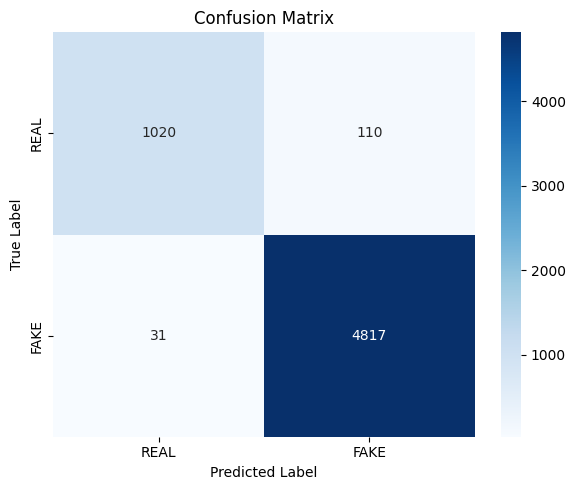

In [21]:
import torch
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Define your device (GPU/CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Lists to store predictions and true labels
predictions = []
true_labels = []

# Run through the DataLoader
model.eval()  # Ensure the model is in evaluation mode
with torch.no_grad():
    for images, aus, labels in test_loader:
        images = images.to(device)
        aus = aus.to(device)
        labels = labels.to(device)

        # Predict
        outputs = model(images, aus)
        predicted_classes = torch.argmax(outputs, dim=1)

        predictions.extend(predicted_classes.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

# Convert to numpy arrays
predictions = np.array(predictions)
true_labels = np.array(true_labels)

# Accuracy
accuracy = accuracy_score(true_labels, predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")

# F1 Score
f1 = f1_score(true_labels, predictions, average='weighted')
print(f"F1 Score: {f1:.2f}")

# Classification Report
print("\nClassification Report:\n", classification_report(true_labels, predictions))

# Confusion Matrix
cm = confusion_matrix(true_labels, predictions)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["REAL", "FAKE"], yticklabels=["REAL", "FAKE"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


In [22]:
from sklearn.model_selection import KFold
from torch.utils.data import Subset
import numpy as np

k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

accuracies = []
f1_scores = []

for fold, (train_idx, val_idx) in enumerate(kf.split(full_dataset)):
    print(f"\nFold {fold+1}/{k_folds}")
    
    train_subset = Subset(full_dataset, train_idx)
    val_subset = Subset(full_dataset, val_idx)

    train_loader = DataLoader(train_subset, batch_size=32, shuffle=True)
    val_loader = DataLoader(val_subset, batch_size=32)

    # Reinitialize model for each fold
    model = FusionModel(n_aus=len(full_dataset.au_columns)).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
    loss_fn = nn.CrossEntropyLoss()

    # Train 1 epoch for speed (you can do more)
    model.train()
    for images, aus, labels in train_loader:
        images, aus, labels = images.to(device), aus.to(device), labels.to(device)
        preds = model(images, aus)
        loss = loss_fn(preds, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Evaluate on validation set
    model.eval()
    y_true, y_pred = [], []
    with torch.no_grad():
        for images, aus, labels in val_loader:
            images, aus = images.to(device), aus.to(device)
            preds = model(images, aus)
            predicted = torch.argmax(preds, dim=1)
            y_true.extend(labels.numpy())
            y_pred.extend(predicted.cpu().numpy())

    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')
    accuracies.append(acc)
    f1_scores.append(f1)

    print(f"Accuracy: {acc:.4f}, F1 Score: {f1:.4f}")

print(f"\nCross-Validation — Mean Accuracy: {np.mean(accuracies):.4f}, Mean F1: {np.mean(f1_scores):.4f}")



Fold 1/5
Accuracy: 0.9473, F1 Score: 0.9453

Fold 2/5
Accuracy: 0.9522, F1 Score: 0.9520

Fold 3/5
Accuracy: 0.9480, F1 Score: 0.9470

Fold 4/5
Accuracy: 0.9473, F1 Score: 0.9463

Fold 5/5
Accuracy: 0.9486, F1 Score: 0.9470

Cross-Validation — Mean Accuracy: 0.9487, Mean F1: 0.9475


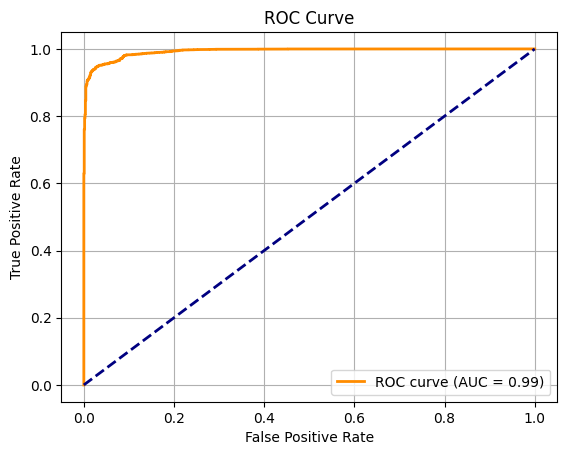

In [23]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

model.eval()
all_probs = []
all_true = []

with torch.no_grad():
    for images, aus, labels in test_loader:
        images, aus = images.to(device), aus.to(device)
        outputs = model(images, aus)
        probs = torch.softmax(outputs, dim=1)[:, 1]  # Probability of class 1 (FAKE)
        all_probs.extend(probs.cpu().numpy())
        all_true.extend(labels.cpu().numpy())

fpr, tpr, _ = roc_curve(all_true, all_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


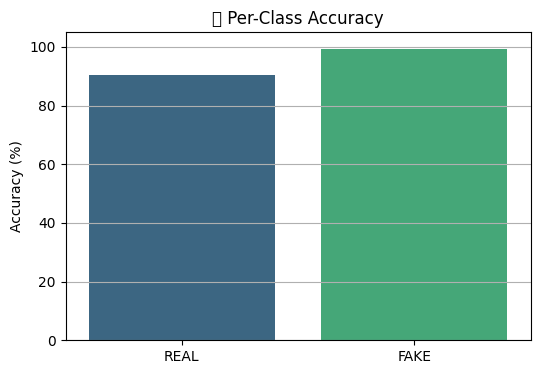

In [24]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(true_labels, predictions)
per_class_acc = cm.diagonal() / cm.sum(axis=1)

classes = ["REAL", "FAKE"]

plt.figure(figsize=(6, 4))
sns.barplot(x=classes, y=per_class_acc * 100, palette="viridis")
plt.ylabel("Accuracy (%)")
plt.title("🎯 Per-Class Accuracy")
plt.ylim(0, 105)
plt.grid(axis='y')
plt.show()


In [27]:
for image, au, true_label in test_loader:
    for i in range(image.size(0)):
        img_i = image[i].unsqueeze(0).to(device)
        au_i = au[i].unsqueeze(0).to(device)
        true_label_i = true_label[i].item()

        with torch.no_grad():
            output = model(img_i, au_i)
            predicted_class = torch.argmax(output, dim=1).item()
            prob = torch.softmax(output, dim=1).squeeze().cpu().numpy()

        label_str = "REAL" if predicted_class == 0 else "FAKE"
        true_str = "REAL" if true_label_i == 0 else "FAKE"

        print(f"Predicted: {label_str} ({prob[predicted_class]*100:.2f}%) — Actual: {true_str}")  # remove this break if you want to loop over more
    break


Predicted: FAKE (99.98%) — Actual: FAKE
Predicted: FAKE (99.98%) — Actual: FAKE
Predicted: FAKE (99.92%) — Actual: FAKE
Predicted: FAKE (90.34%) — Actual: FAKE
Predicted: FAKE (99.99%) — Actual: FAKE
Predicted: FAKE (99.98%) — Actual: FAKE
Predicted: FAKE (99.87%) — Actual: FAKE
Predicted: FAKE (95.66%) — Actual: FAKE
Predicted: FAKE (99.95%) — Actual: FAKE
Predicted: FAKE (99.98%) — Actual: FAKE
Predicted: FAKE (92.77%) — Actual: FAKE
Predicted: FAKE (58.89%) — Actual: FAKE
Predicted: FAKE (82.08%) — Actual: FAKE
Predicted: FAKE (98.93%) — Actual: FAKE
Predicted: FAKE (99.95%) — Actual: FAKE
Predicted: REAL (99.02%) — Actual: REAL
Predicted: FAKE (99.98%) — Actual: FAKE
Predicted: FAKE (99.97%) — Actual: FAKE
Predicted: REAL (98.92%) — Actual: REAL
Predicted: FAKE (80.75%) — Actual: FAKE
Predicted: FAKE (99.93%) — Actual: FAKE
Predicted: FAKE (99.77%) — Actual: FAKE
Predicted: REAL (99.79%) — Actual: REAL
Predicted: FAKE (99.81%) — Actual: FAKE
Predicted: FAKE (78.10%) — Actual: FAKE
